# Choose a Data Set
Pick one of the following data sets to analyze for your final project. 
- [Cosmetics](https://drive.google.com/drive/folders/1qvmRfGb7a_pYAtgW6614gxlP-bxl_Ptz?usp=drive_link)
- [Mental Health](https://drive.google.com/drive/folders/1YOp1aQVcmqlAkUEGHNPl_TyNXbY-xHwO?usp=drive_link)
- [Pokemon](https://drive.google.com/drive/folders/1kDu2oRgm_hUW5hdM0tHnMUqCGSKUYT1v?usp=drive_link)
- [Ramen](https://drive.google.com/drive/folders/1Y4_5QHOCy8rHc5EsEwDUuoCfp2WLo-MN?usp=drive_link)
- <B><U><I>[Student Performance](https://drive.google.com/drive/folders/1fE31Ka38AnGpgfI_Es3z4psuA0phhH0Y?usp=drive_link)

# My Question:

<I><U> Does a parent's influence-parental involvement, family income, and parental education level-determine a students results on a test, and if so what is the best level of parental influence? </U></I>

# My Analysis:

## <U>Imports/Setup

In [14]:
import pandas as pd
import seaborn as sns
from Utils.KeyMethods import KeyMethods
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("students.csv")

## <U>Parent's Involvement

<AxesSubplot:xlabel='Parental_Involvement', ylabel='amount'>

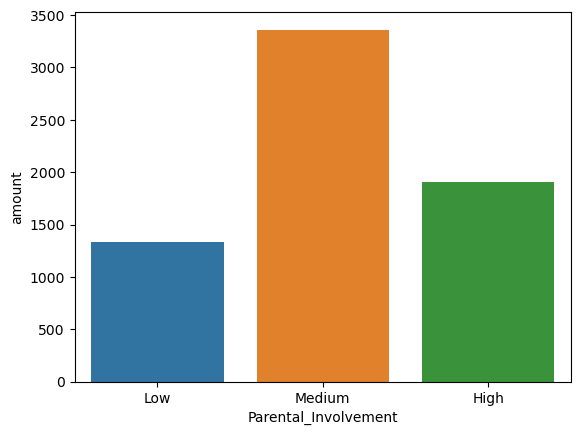

In [3]:
involvements = {}

for involvement in df["Parental_Involvement"]:
    if involvement in involvements:
        involvements[involvement] += 1
    else:
        involvements[involvement] = 1
        
graph = {
    "Parental_Involvement" : involvements.keys(),
    "amount" : involvements.values()
}

graphDF = pd.DataFrame(graph)

sns.barplot(x = "Parental_Involvement",
            y = "amount",
            data = graphDF)

Most students had a medium parental involvement, now let's compare parental Involvement to test scores.

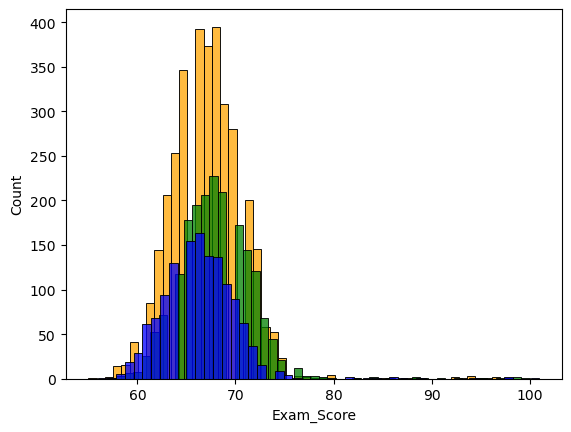

In [4]:
df_Low = df[df["Parental_Involvement"] ==  "Low"]
df_Medium = df[df["Parental_Involvement"] ==  "Medium"]
df_High = df[df["Parental_Involvement"] ==  "High"]

def OverlayHistograms(dataSets, x, bins, colors):
    for i in range(len(dataSets)):
        color = colors[i]
        sns.histplot(data = dataSets[i], x = x, bins = bins, color = color)  
        
OverlayHistograms([df_Medium, df_High, df_Low], "Exam_Score", 50, ["orange", "green", "blue"])

The graph shows that the majority of scores were unaltered by a parent's involvements. They were all focused around the 67-ish mark. With them being so close, let's see if we can find the median and standard deviation for each level of involvement.

In [35]:
lowMean = KeyMethods.getMean(df_Low, "Exam_Score")
mediumMean = KeyMethods.getMean(df_Medium, "Exam_Score")
highMean = KeyMethods.getMean(df_High, "Exam_Score")

lowSD = KeyMethods.getStandardDeviation(df_Low, "Exam_Score")
mediumSD = KeyMethods.getStandardDeviation(df_Medium, "Exam_Score")
highSD = KeyMethods.getStandardDeviation(df_High, "Exam_Score")

involvementDict = {
    "Low" : (lowMean, lowSD),
    "Medium" : (mediumMean, mediumSD),
    "High" : (highMean, highSD)
}

df_Involvement = pd.DataFrame(involvementDict)
df_Involvement.index = ("Mean", "Standard Deviation")
df_Involvement

,Low,Medium,High
Mean,66.848428,67.334959,67.842396
Standard Deviation,3.800807,3.806476,4.155161


Now that's a bit better to read. The Low amount of parental involvement has the lowest mean of test scores and since it's Standard Deviation is the least, low amount of parental involvement results in worse test scores. The mean for Medium and High test scores are off by 0.507%, so a rather minimal difference, but High has a standard Deviation of 4.155161. This greater standard Deviation means that people of a high parental involvement have a greater range of test scores.

## <U>Family Income

<AxesSubplot:xlabel='Family_Income', ylabel='amount'>

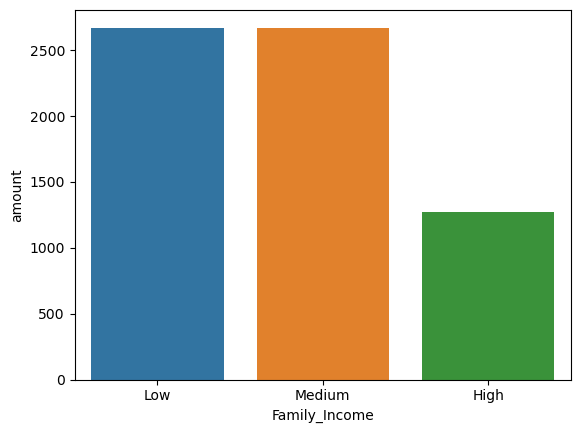

In [6]:
incomes = {}

for income in df["Family_Income"]:
    if income in incomes:
        incomes[income] += 1
    else:
        incomes[income] = 1
        
graph = {
    "Family_Income" : incomes.keys(),
    "amount" : incomes.values()
}

graphDF = pd.DataFrame(graph)

sns.barplot(x = "Family_Income",
            y = "amount",
            data = graphDF)

This bar graph shows that most people have either a low or Medium family income, now let's see if Family income changes a student's test score.

In [5]:
df_Low = df[df["Family_Income"] ==  "Low"]
df_Medium = df[df["Family_Income"] ==  "Medium"]
df_High = df[df["Family_Income"] ==  "High"]

lowFiveData = KeyMethods.getFiveData(df_Low, "Exam_Score")
mediumFiveData = KeyMethods.getFiveData(df_Medium, "Exam_Score")
highFiveData = KeyMethods.getFiveData(df_High, "Exam_Score")

fiveData = {
    "Low" : lowFiveData.values(),
    "Medium" : mediumFiveData.values(),
    "High" : highFiveData.values()
}

df_FiveData = pd.DataFrame(fiveData)
df_FiveData.index = lowFiveData.keys()
df_FiveData

,Low,Medium,High
Max,97.0,99.0,101.0
Q3,69.0,70.0,70.0
Median,67.0,67.0,68.0
Q1,65.0,65.0,65.0
Min,55.0,57.0,58.0


This data shows that family incomes does have a very minimal impact on a students test scores. While the exam Median value is rather constant, staying roughly around the 67%, the max and min values all raise based on income. Those with a Higher income have a higher chance to get a better score.

## <U>Parental Education Level

<AxesSubplot:xlabel='Parental_Education_Level', ylabel='amount'>

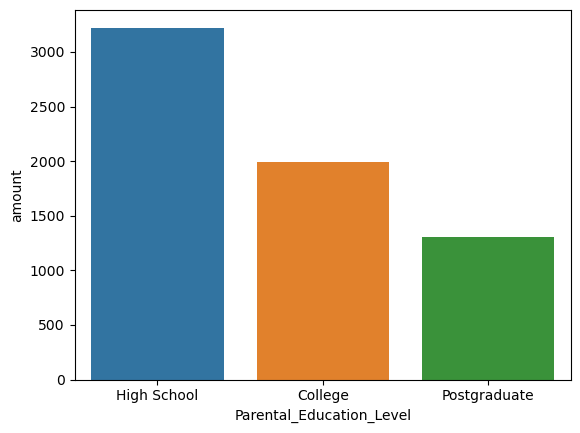

In [7]:
educations = {}

for education in df["Parental_Education_Level"]:
    if education in educations:
        educations[education] += 1
    else:
        educations[education] = 1
        
graph = {
    "Parental_Education_Level" : educations.keys(),
    "amount" : educations.values()
}

graphDF = pd.DataFrame(graph)

sns.barplot(x = "Parental_Education_Level",
            y = "amount",
            data = graphDF)

This graph shows that there is a rather linear decline in education level-with the most common being a highschool diploma, and the rarest being a postgraduate degree. Now let's see if a parent's educationhelps a student succeed on a test.

<AxesSubplot:xlabel='Exam_Score', ylabel='Parental_Education_Level'>

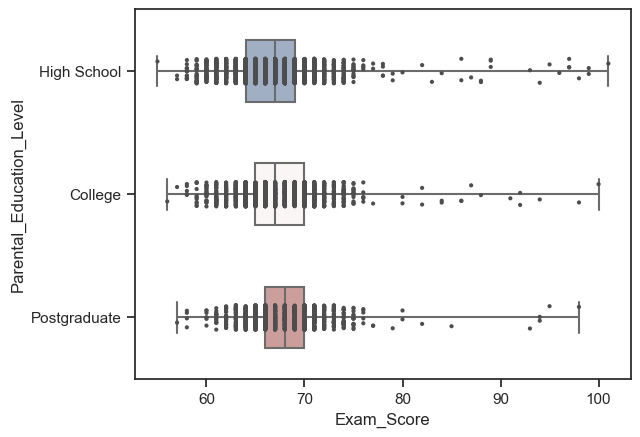

In [38]:
sns.boxplot(
    data = df, x="Exam_Score", y="Parental_Education_Level",
    whis=[0, 100], width=0.5, palette="vlag"
)

sns.stripplot(data = df, x="Exam_Score", y="Parental_Education_Level", size=3, color=".3")

This boxplot shows that, again, most of the data is minimally affected by the parent's influence. Interestingly, as the education increases the possible range decreases. This means that student's whose parent's have only a high school diploma have a chance to get the highest possible score, but they also have a chance to score the lowest-while students of postgraduates have less of a chance to do poorly but less of a chance to do well. 

# My Answer:

<I><U>While minimal, parental influence does actually have an effect on a student's test score</U></I>. A high parental involvement in a student's academic life leads to a higher chance of having a test score higher than 67.842396%, while low parental involvement leads to a chance of scoring less than(or around) 66.848428. A very similiar effect is found with family income, where students with high income families have a range of 101.0 - 58.0 while those with a low income have a range of 97.0 - 55.0. This pattern, however, was broken with the parental education; student's parent's who have a high school diploma have a greater chance of scoring well, they have the biggest range with a median of ~65.5%. Postgraduates have the direct inverse effect, they have the least range, but the highest median of ~67.0%. This leaves student's of parents with a college degree, who are directly in the middle, they have a median of ~65.5% with a range directly in the middle of the other two. This leads to the conclusion that the best combination of parental influence is <I><U>extremely wealthy college graduates who view their child's grades as a direct representation of their parenting abilities.</U></I>